In [19]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [20]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_att_salary_17-18')

In [21]:
qbs.dtypes

NAME         object
ATT           int64
ATT_rank    float64
salary        int64
dtype: object

In [22]:
qbs.head()

,NAME,ATT,ATT_rank,salary
0,Tom Brady,581,1.0,20500000
1,Philip Rivers,575,2.0,20812500
2,Eli Manning,571,3.0,21000000
3,Matthew Stafford,565,4.0,27000000
4,Ben Roethlisberger,561,5.0,21850000


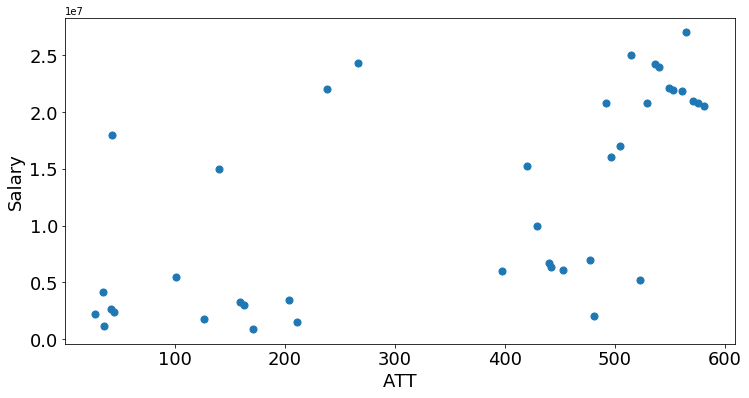

In [23]:
ax = qbs.plot(kind="scatter", x = 'ATT',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('ATT', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [24]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['ATT', 'salary']])

In [25]:
X.mean(axis = 0)

array([ 2.84672570e-17, -1.13869028e-17])

In [26]:
X.std(axis = 0)

array([1., 1.])

In [27]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [28]:
km.cluster_centers_

array([[-1.21090849, -1.08037345],
       [ 0.62635209,  0.42832472],
       [ 0.99826889,  1.14832803],
       [ 0.53326759, -0.6876158 ],
       [-0.89838044,  0.85012431]])

In [29]:
km.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 3, 3, 3, 3, 3, 3, 1,
       3, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0], dtype=int32)

In [30]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,ATT,ATT_rank,salary,clusters
0,Tom Brady,581,1.0,20500000,2
1,Philip Rivers,575,2.0,20812500,2
2,Eli Manning,571,3.0,21000000,2
3,Matthew Stafford,565,4.0,27000000,2
4,Ben Roethlisberger,561,5.0,21850000,2


In [31]:
ss.inverse_transform(km.cluster_centers_)

array([[1.10166667e+02, 2.65538175e+06],
       [4.73666667e+02, 1.60833333e+07],
       [5.47250000e+02, 2.24916194e+07],
       [4.55250000e+02, 6.15106488e+06],
       [1.72000000e+02, 1.98375000e+07]])

In [32]:
qbs.groupby('clusters')[['ATT', 'salary']].mean()

,ATT,salary
clusters,,
0,110.166667,2.655382e+06
1,473.666667,1.608333e+07
2,547.250000,2.249162e+07
3,455.250000,6.151065e+06
4,172.000000,1.983750e+07


In [33]:
centroids = qbs.groupby('clusters')[['ATT', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

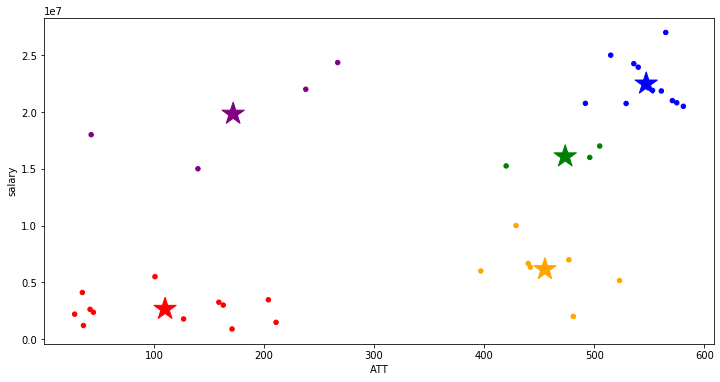

In [34]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'ATT', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'ATT', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [35]:
km.inertia_

4.711499164988834

In [36]:
silhouette_score(X, km.labels_)

0.620733503986371